# Graph Visualization
Here we will load a graph database from for the [Pennslyvania Road Network](https://snap.stanford.edu/data/roadNet-PA.html) and create a basic graph analysis including graph diameter and other metrics.

In [40]:
# import necessary packages
import urllib.request
import gzip
import networkx as nx
import matplotlib.pyplot as plt

## Download data
- Download and save graph database file
- Create preview for first 50 lines of file
- Save and view results

In [50]:
# URL of the .txt.gz file
url = 'https://snap.stanford.edu/data/roadNet-PA.txt.gz'
output_file = './data/output.txt'  # Path to the output file
preview_file = './data/preview.txt'  # Path to the preview file

# download the file and save it to temp location
temp_file, _ = urllib.request.urlretrieve(url) # returns tuple path, http response header

# decompress downloaded file
with gzip.open(temp_file, 'rb') as gz_file:
    # read as lines and decode as utf-8
    lines = gz_file.readlines()
    decoded_lines = [line.decode('utf-8') for line in lines]

# save decoded lines to a file
with open(output_file, 'w', encoding='utf-8') as f:
    f.writelines(decoded_lines)

# save first 50 lines as preview
with open(preview_file, 'w', encoding='utf-8') as f:
    f.writelines(decoded_lines[:50])

In [53]:
# load preview file
with open(preview_file, "r", encoding='utf-8') as f:
    preview_contents = f.read()

# view contents
print(preview_contents)

# Directed graph (each unordered pair of nodes is saved once): roadNet-PA.txt 
# Pennsylvania road network
# Nodes: 1088092 Edges: 3083796
# FromNodeId	ToNodeId
0	1
0	6309
0	6353
1	0
6353	0
6353	6354
6353	6364
6353	6386
6309	0
6309	6310
6309	6344
2	3
2	4
2	7
3	2
3	309
4	2
4	273
4	274
4	388
7	2
7	8
7	16
7	3998
309	3
309	6
309	274
309	1060390
273	4
273	3861
273	3862
273	3872
274	4
274	309
274	3862
274	1060215
388	4
388	389
388	4005
388	4006
5	6
5	8
5	9
6	5
6	305
6	309



## Load into networkx
- Create graph object
- open file and iterate through
- Skip header info by only assigning values to edges if length equals 2

In [61]:
# create graph object
G = nx.Graph()

# load into graph
with open(preview_file, 'r') as f:
    for line in f:
        values = line.strip().split()
        if len(values) == 2:
            u, v = values
            G.add_edge(u, v)

# check results
print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())
print(G)

Number of nodes 32
Number of edges 33
Graph with 32 nodes and 33 edges


## Plot graph

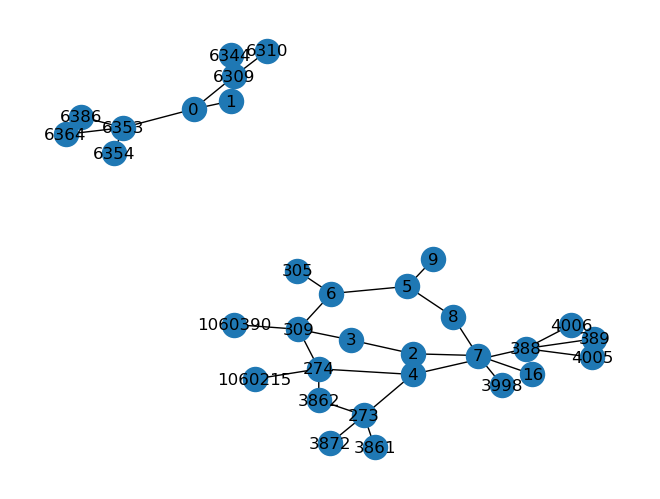

In [60]:
nx.draw(G, with_labels=True)
plt.show()

## Graph Analysis
- Diameter
- 